# Training the Classifier

## Importing Libraries

In [1]:
import keras
from build_model import classifier_model
from training_data import load_data, preprocess_data

import matplotlib.pyplot as plt

executing inline ploting command for matplotlib

In [2]:
%matplotlib inline

## Loading and Preprocessing the dataset

loading the dataset

In [3]:
X_train, y_train, X_test, y_test = load_data()

11493376/11490434 [==============================] - 0s 0us/step


preprocessing and finalizing the dataset for training and testing

In [4]:
X_train_classifier, y_train_classifier, X_val_classifier, y_val_classifier, X_test_classifier, y_test_classifier = preprocess_data(X_train, y_train, X_test, y_test)

## Vizualizing the Dataset

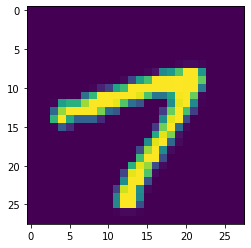

In [5]:
plt.imshow(X_train[101])

In [6]:
y_train[101]

7

## Classification Model

specifying the classification model

In [7]:
classifier = classifier_model()

classification model summary

In [8]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

### model training

specifying the callbacks

In [9]:
callbacks = [
    keras.callbacks.ModelCheckpoint('classifier.h5', save_best_only=True),
    keras.callbacks.ReduceLROnPlateau()]

training the model and saving the training history

In [10]:
history = classifier.fit(X_train_classifier, y_train_classifier, batch_size=32, epochs=100, verbose=1, validation_data = (X_val_classifier, y_val_classifier), callbacks = callbacks)

Epoch 1/100
1688/1688 [==============================] - 38s 4ms/step - loss: 0.3486 - accuracy: 0.8885 - val_loss: 0.0601 - val_accuracy: 0.9818
Epoch 2/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0739 - accuracy: 0.9774 - val_loss: 0.0435 - val_accuracy: 0.9872
Epoch 3/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0589 - accuracy: 0.9818 - val_loss: 0.0407 - val_accuracy: 0.9877
Epoch 4/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.0294 - val_accuracy: 0.9908
Epoch 5/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0294 - val_accuracy: 0.9913
Epoch 6/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.0322 - val_accuracy: 0.9905
Epoch 7/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0321 - accuracy: 0.9895 - val_loss: 0.0317 - val_a

## Training Evaluation

model model accuracy performance during training

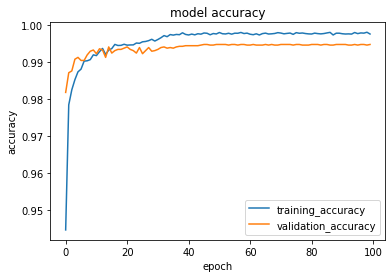

In [11]:
plt.plot(history.history['accuracy'][0:100])
plt.plot(history.history['val_accuracy'][0:100])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower right')
plt.show()

model loss convergence during training

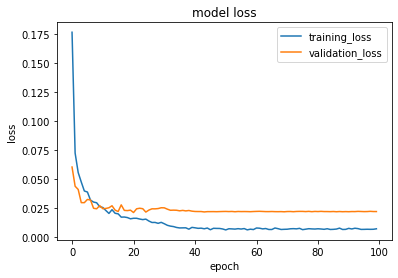

In [12]:
plt.plot(history.history['loss'][0:100])
plt.plot(history.history['val_loss'][0:100])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()